In [1]:
from netCDF4 import Dataset
import cartopy
import xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter
from cartopy.util import add_cyclic_point
from matplotlib import colors
import geopandas as gpd
import shapely.geometry as shp
import rioxarray
import pyproj
import pandas as pd

nctoolkit is using Climate Data Operators version 1.9.8


In [2]:
nct.deep_clean()

In [3]:
os.chdir('/media/jasmine/Album/Project/')
print(os.getcwd())

/media/jasmine/Album/Project


In [4]:
variable = "siconc"
print(variable)
model = "CESM2-WACCM"
print(model)
experiment = "ssp585"
print(experiment)
freq = "SImon"
print(freq)

siconc
CESM2-WACCM
ssp585
SImon


In [6]:
nc = Dataset("Data/Raw/siconc_SImon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc")
unit = getattr(nc.variables[variable], "units")
unit
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.7 CMIP-6.2
    activity_id: CMIP
    case_id: 4
    cesm_casename: b.e21.BWHIST.f09_g17.CMIP6-historical-WACCM.001
    contact: cesm_cmip6@ucar.edu
    creation_date: 2019-01-31T00:04:12Z
    data_specs_version: 01.00.29
    experiment: all-forcing simulation of the recent past
    experiment_id: historical
    external_variables: areacello
    forcing_index: 1
    frequency: mon
    further_info_url: https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2-WACCM.historical.none.r1i1p1f1
    grid: native gx1v7 displaced pole grid (384x320 latxlon)
    grid_label: gn
    initialization_index: 1
    institution: National Center for Atmospheric Research, Climate and Global Dynamics Laboratory, 1850 Table Mesa Drive, Boulder, CO 80305, USA
    institution_id: NCAR
    license: CMIP6 model data produced by <The National Center for Atmospheric Research> is licensed under a Creative Commons Attr

## Interpolation


In [45]:
for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_{}".format(variable, freq, model, experiment)):
        print(file)

print("\n")

for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_historical".format(variable, freq, model)):
        print(file)

siconc_SImon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc
siconc_SImon_CESM2-WACCM_ssp585_r1i1p1f1_gn_210101-215012.nc
siconc_SImon_CESM2-WACCM_ssp585_r1i1p1f1_gn_215101-220012.nc
siconc_SImon_CESM2-WACCM_ssp585_r1i1p1f1_gn_220101-225012.nc
siconc_SImon_CESM2-WACCM_ssp585_r1i1p1f1_gn_225101-229912.nc


siconc_SImon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc


In [52]:
ds = nct.open_data("Data/Raw/siconc_SImon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc")
ds.to_latlon(lon = [-180, 180], lat = [-90, 90], res = [1, 1])
ds.to_nc("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment), overwrite=True)

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'siconc' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'siconc' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.


In [46]:
!cdo remapdis,r360x180 Data/Raw/siconc_SImon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc Data/{variable}_{model}_{experiment}_remapped.nc

Warning (cdfInqContents): Coordinates variable time can't be assigned!
cdo    remapdis: Distance-weighted average weights from curvilinear (320x384) to lonlat (360x180) grid, with source mask (86096)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapdis: Processed 1 variable over 1032 timesteps [10.83s 315MB].


In [34]:
!cdo remapbil,r360x180 Data/Raw/siconc_SImon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012_cropped.nc Data/{variable}_{model}_{experiment}_remapped.nc

Warning (cdfInqContents): Coordinates variable time can't be assigned!
cdf_create        : ncid = -1  mode = 4096  chunksizehint = 0 file = Data/siconc_CESM2-WACCM_ssp585_remapped.nc

Error (cdf_create): Data/siconc_CESM2-WACCM_ssp585_remapped.nc: Permission denied


<xarray.Dataset>
Dimensions:    (time: 1, bnds: 2, lon: 360, lat: 180)
Coordinates:
  * time       (time) object 2015-01-15 12:00:00
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    siconc     (time, lat, lon) float32 ...
Attributes: (12/45)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 08 22:07:48 2022: cdo remapdis,r360x180 -...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    tracking_id:            hdl:21.14100/eae71066-bf12-4e97-a1a5-93f44aa88d64
    variable_id:            siconc
    variant_info:           CMIP6 CESM2 future scenario SSP5-8.5 between 2014...
    variant_label:          r1i1p1f1
    NCO:                    netCDF Operators version 4.9.1 (Homepage = http:/...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

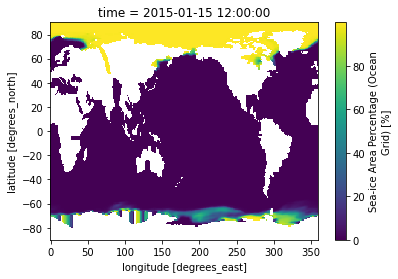

In [53]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.sel(time = "2015-01")
nc[variable].plot()
nc

In [16]:
!cdo remapdis,r360x180 Data/Raw/siconc_SImon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc Data/{variable}_{model}_historical_remapped.nc

Warning (cdfInqContents): Coordinates variable time can't be assigned!
cdo    remapdis: Distance-weighted average weights from curvilinear (320x384) to lonlat (360x180) grid, with source mask (86096)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapdis: Processed 1 variable over 1980 timesteps [18.95s 230MB].


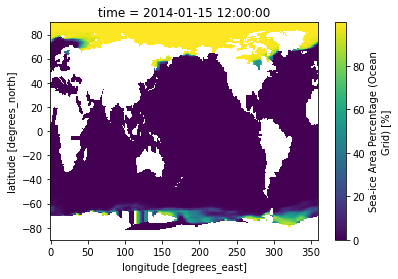

In [17]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.sel(time = "2014-01")
nc[variable].plot()

## Sea ice selection

#### Selecting mask region

In [7]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.sel(lat=slice(-90,0))
nc

FileNotFoundError: [Errno 2] No such file or directory: b'/media/jasmine/Album/Project/Data/siconc_CESM2-WACCM_historical_remapped.nc'

<xarray.Dataset>
Dimensions:    (time: 1, nj: 384, ni: 320, d2: 2, nvertices: 4)
Coordinates:
    lat        (nj, ni) float64 ...
    lon        (nj, ni) float64 ...
  * ni         (ni) int32 1 2 3 4 5 6 7 8 9 ... 313 314 315 316 317 318 319 320
  * nj         (nj) int32 1 2 3 4 5 6 7 8 9 ... 377 378 379 380 381 382 383 384
  * time       (time) object 2014-01-15 12:00:00
Dimensions without coordinates: d2, nvertices
Data variables:
    siconc     (time, nj, ni) float32 ...
    time_bnds  (time, d2) object ...
    lat_bnds   (nj, ni, nvertices) float32 ...
    lon_bnds   (nj, ni, nvertices) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                4
    cesm_casename:          b.e21.BWHIST.f09_g17.CMIP6-historical-WACCM.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-31T00:04:12Z
    ...                     ...
    variable_id:            siconc
    variant_info:           CMIP6 CESM2 hindcast (1850-2014) with high-top at...
    variant_label:          r1i1p1f1
    branch_time_in_parent:  20075.0
    branch_time_in_child:   674885.0
    branch_method:          standard

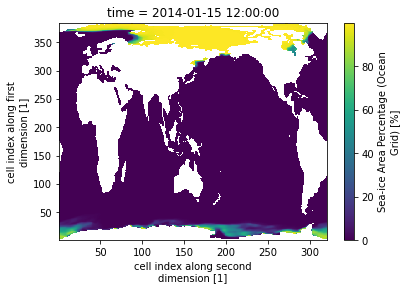

In [9]:
nc = xarray.open_dataset("Data/Raw/siconc_SImon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc")
nc = nc.sel(time = "2014-01")
nc[variable].plot()
nc

In [21]:
nc = xarray.open_dataset("Data/Raw/siconc_SImon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc")
nc
#nc = nc.sel(nj=slice(0,200))
#nc

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'siconc' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.


<xarray.Dataset>
Dimensions:    (time: 1980, nj: 384, ni: 320, d2: 2, nvertices: 4)
Coordinates:
    lat        (nj, ni) float64 ...
    lon        (nj, ni) float64 ...
  * ni         (ni) int32 1 2 3 4 5 6 7 8 9 ... 313 314 315 316 317 318 319 320
  * nj         (nj) int32 1 2 3 4 5 6 7 8 9 ... 377 378 379 380 381 382 383 384
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
Dimensions without coordinates: d2, nvertices
Data variables:
    siconc     (time, nj, ni) float32 ...
    time_bnds  (time, d2) object ...
    lat_bnds   (nj, ni, nvertices) float32 ...
    lon_bnds   (nj, ni, nvertices) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                4
    cesm_casename:          b.e21.BWHIST.f09_g17.CMIP6-historical-WACCM.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-31T00:04:12Z
    ...                     ...
    variable_id:            siconc
    variant_info:           CMIP6 CESM2 hindcast (1850-2014) with high-top at...
    variant_label:          r1i1p1f1
    branch_time_in_parent:  20075.0
    branch_time_in_child:   674885.0
    branch_method:          standard

In [22]:
nc.

AttributeError: 'Dataset' object has no attribute 'crs'

In [ ]:
cc = pyproj.CRS.from_cf(

In [11]:
# Selecting the last 20 years of historical
#nc = nc.drop_vars("time_bnds")
history = nc.sel(time=slice('1995-01', '2014-12'))
history

<xarray.Dataset>
Dimensions:    (time: 240, nj: 200, ni: 320, d2: 2, nvertices: 4)
Coordinates:
    lat        (nj, ni) float64 -79.22 -79.22 -79.22 ... 3.318 3.318 3.318
    lon        (nj, ni) float64 320.6 321.7 322.8 323.9 ... 317.2 318.3 319.4
  * ni         (ni) int32 1 2 3 4 5 6 7 8 9 ... 313 314 315 316 317 318 319 320
  * nj         (nj) int32 1 2 3 4 5 6 7 8 9 ... 193 194 195 196 197 198 199 200
  * time       (time) object 1995-01-15 12:00:00 ... 2014-12-15 12:00:00
Dimensions without coordinates: d2, nvertices
Data variables:
    siconc     (time, nj, ni) float32 ...
    time_bnds  (time, d2) object 1995-01-01 00:00:00 ... 2015-01-01 00:00:00
    lat_bnds   (nj, ni, nvertices) float32 ...
    lon_bnds   (nj, ni, nvertices) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                4
    cesm_casename:          b.e21.BWHIST.f09_g17.CMIP6-historical-WACCM.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-31T00:04:12Z
    ...                     ...
    variable_id:            siconc
    variant_info:           CMIP6 CESM2 hindcast (1850-2014) with high-top at...
    variant_label:          r1i1p1f1
    branch_time_in_parent:  20075.0
    branch_time_in_child:   674885.0
    branch_method:          standard

In [12]:
# Finding yearly max ice cover 
yearly_max = history.groupby("time.year").max("time")
yearly_max

<xarray.Dataset>
Dimensions:    (year: 20, nj: 200, ni: 320, d2: 2, nvertices: 4)
Coordinates:
    lat        (nj, ni) float64 -79.22 -79.22 -79.22 ... 3.318 3.318 3.318
    lon        (nj, ni) float64 320.6 321.7 322.8 323.9 ... 317.2 318.3 319.4
  * ni         (ni) int32 1 2 3 4 5 6 7 8 9 ... 313 314 315 316 317 318 319 320
  * nj         (nj) int32 1 2 3 4 5 6 7 8 9 ... 193 194 195 196 197 198 199 200
  * year       (year) int64 1995 1996 1997 1998 1999 ... 2011 2012 2013 2014
Dimensions without coordinates: d2, nvertices
Data variables:
    siconc     (year, nj, ni) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0
    time_bnds  (year, d2) object 1995-12-01 00:00:00 ... 2015-01-01 00:00:00
    lat_bnds   (year, nj, ni, nvertices) float32 -79.49 -79.49 ... 3.449 3.449
    lon_bnds   (year, nj, ni, nvertices) float32 320.0 321.1 ... 320.0 318.9

In [13]:
# Calculating mean over 20 years
mean = yearly_max.mean(dim = "year")
mean

<xarray.Dataset>
Dimensions:   (nj: 200, ni: 320, nvertices: 4)
Coordinates:
    lat       (nj, ni) float64 -79.22 -79.22 -79.22 -79.22 ... 3.318 3.318 3.318
    lon       (nj, ni) float64 320.6 321.7 322.8 323.9 ... 317.2 318.3 319.4
  * ni        (ni) int32 1 2 3 4 5 6 7 8 9 ... 313 314 315 316 317 318 319 320
  * nj        (nj) int32 1 2 3 4 5 6 7 8 9 ... 193 194 195 196 197 198 199 200
Dimensions without coordinates: nvertices
Data variables:
    siconc    (nj, ni) float32 nan nan nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0
    lat_bnds  (nj, ni, nvertices) float32 -79.49 -79.49 -78.95 ... 3.449 3.449
    lon_bnds  (nj, ni, nvertices) float32 320.0 321.1 321.1 ... 320.0 318.9

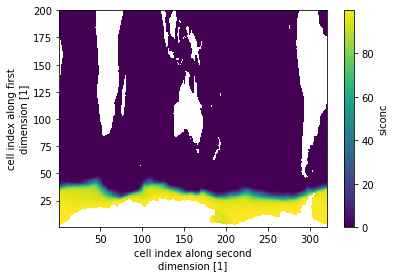

In [14]:
mean[variable].plot()

In [15]:
mean.to_netcdf(path = "Data/{}_{}_ice_extent.nc".format(variable, model), mode = "w", format = "NETCDF4")

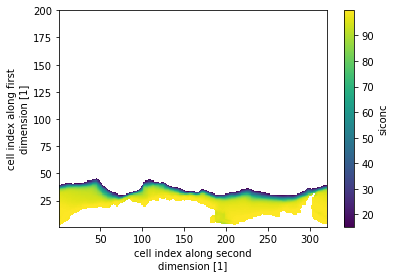

In [16]:
# Select cells with >15% ice cover
ice = mean.where(mean >= 15)
ice[variable].plot()

In [17]:
ice = ice.assign(ice = lambda x: getattr(x, variable) - getattr(x, variable) + 1)

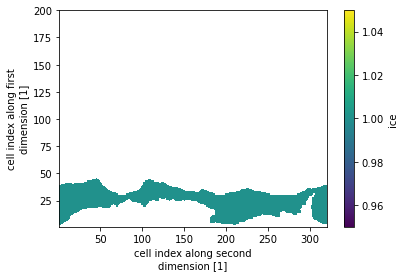

In [18]:
ice['ice'].plot()

In [19]:
ice = ice.drop_vars("siconc")
ice.to_netcdf(path = "Data/Shape/{}_{}_ice_region.nc".format(variable, model), mode = "w", format = "NETCDF4")

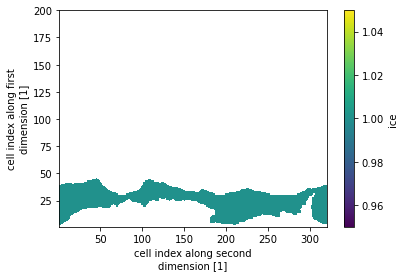

In [20]:
nc = xarray.open_dataset("Data/Shape/{}_{}_ice_region.nc".format(variable, model))
nc['ice'].plot()

### Making mask

In [6]:
shape = gpd.read_file("Shapes/{}_ice_margin.shp".format(model), crs = "EPSG:4326")
shape

,DN,geometry
0,1,"POLYGON ((2.500 -57.000, 10.500 -57.000, 10.50..."


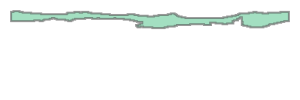

In [7]:
coord1 = shape['geometry'][0].exterior.coords
line1 = shp.LinearRing(coord1)
poly1 = shp.Polygon(line1)
poly1

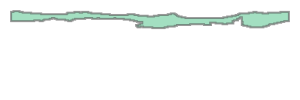

In [8]:
multi_poly = shp.MultiPolygon([poly1])
multi_poly

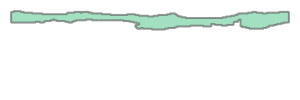

In [9]:
# Expand the region by 1 cells to include open sea
expand = shp.Polygon(multi_poly.buffer(1.0))
expand

In [10]:
ice_new = gpd.GeoSeries(expand)
ice_new

0    POLYGON ((1.500 -57.000, 1.505 -56.902, 1.519 ...
dtype: geometry

In [11]:
ice_new.to_file(driver = 'ESRI Shapefile', filename= "Shapes/{}_extended_ice_margin.shp".format(model))

In [13]:
ice_new.crs = {'init' :'epsg:4326'}

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


<AxesSubplot:>

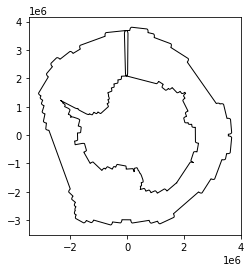

In [14]:
df_ae = ice_new.to_crs("epsg:3031")
df_ae.plot(facecolor="none", edgecolor="black")

In [16]:
df_ae.to_file(driver = 'ESRI Shapefile', filename= "Shapes/{}_ice_margin_remapped.shp".format(model))